In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\hp\Documents\Data Science\Naresh IT\EDA with Python\Visadataset - Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
cat=visa_df.select_dtypes(exclude=object).columns
cat

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [5]:
num_cols=visa_df.select_dtypes(include=object).columns
num_cols

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [6]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [7]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**How many asia people got the visa Certified**
**How many asia people got the visa Denied**

In [8]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Certified')
con=con1&con2
len(visa_df[con])
print(f"The number of Employees Visa Certified are:{len(visa_df[con])}")


The number of Employees Visa Certified are:11012


In [9]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Denied')
con=con1&con2
len(visa_df[con])
print(f"The number of Employees Visa Denied are:{len(visa_df[con])}")


The number of Employees Visa Denied are:5849


In [10]:
keys=visa_df['continent'].unique()
certList=[]
deniedList=[]
for i in keys:
    con1=(visa_df['continent']==i)
    con2=(visa_df['case_status']=='Certified')
    con3=(visa_df['case_status']=='Denied')
    cert_con=con1&con2
    non_cert_con=con1&con3
    certList.append(len(visa_df[cert_con]))
    deniedList.append(len(visa_df[non_cert_con]))

pd.DataFrame(zip(certList,deniedList),columns=['Certified','Denied'],index=keys)

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross Tab**

In [11]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1=pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [12]:
col1=visa_df['continent']
col2=visa_df['case_status']
result2=pd.crosstab(col2,col1)
result2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


In [13]:
# first param is index

<Axes: xlabel='continent'>

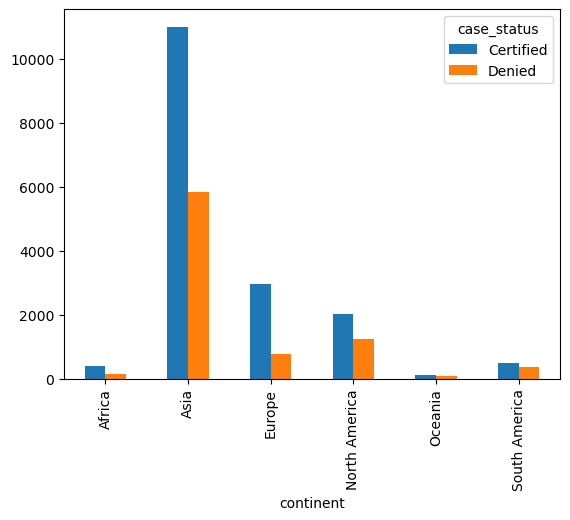

In [14]:
result1.plot(kind='bar')

<Axes: xlabel='case_status'>

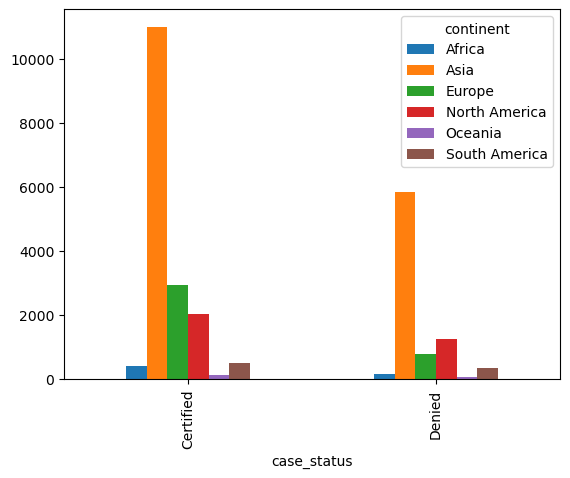

In [15]:
result2.plot(kind='bar')

In [16]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col2]
result3=pd.crosstab(col,col3)
result3

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

<Axes: xlabel='continent,education_of_employee'>

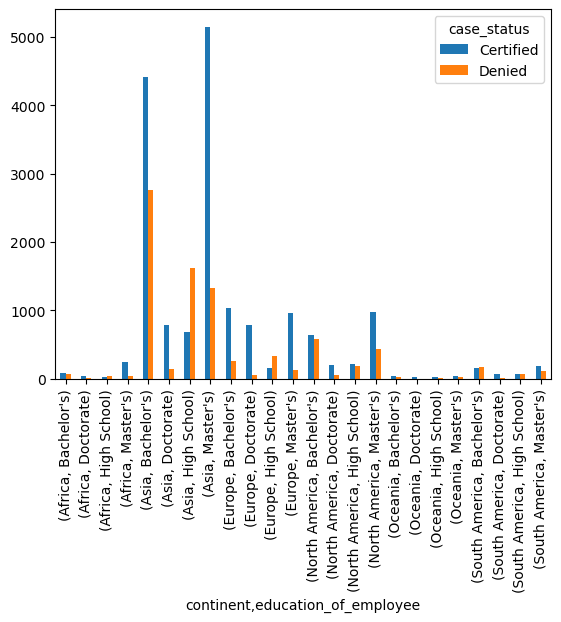

In [17]:
result3.plot(kind='bar')

**Numerical-Numerical**

- In order to plot numerical vs numerical we need to use scatter plot
- Scatter plots will give the relation between two numerical columns
- It is under matplotlib 

$plt.scatter$

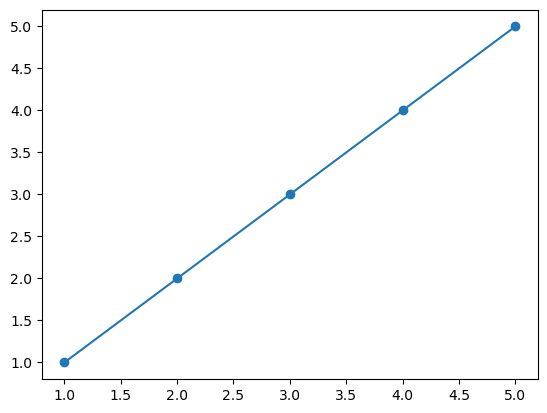

In [18]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
# it is y=x plot
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

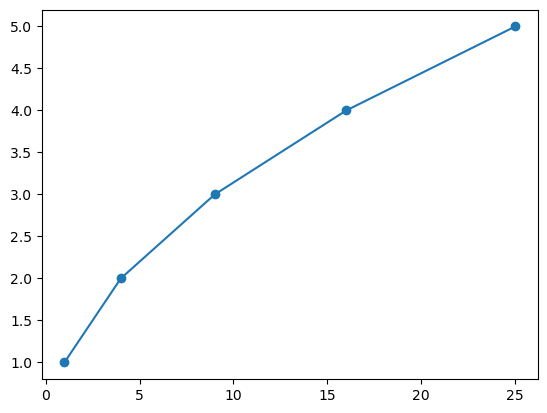

In [19]:
x=[1,4,9,16,25]
y=[1,2,3,4,5]
# it is y=x^2 plot
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

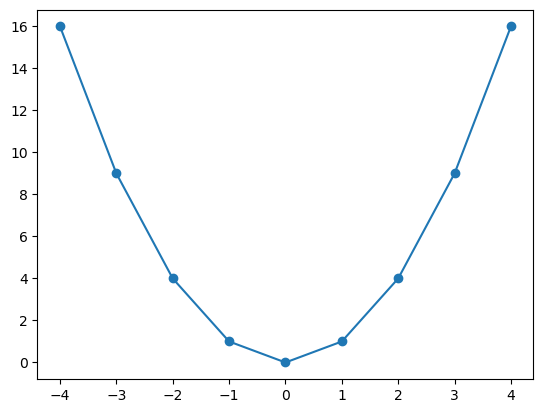

In [20]:
x=[i for i in range(-4,5)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [21]:
num_cols

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

**Scatter plot-1**

- no of employees and yrofestablish

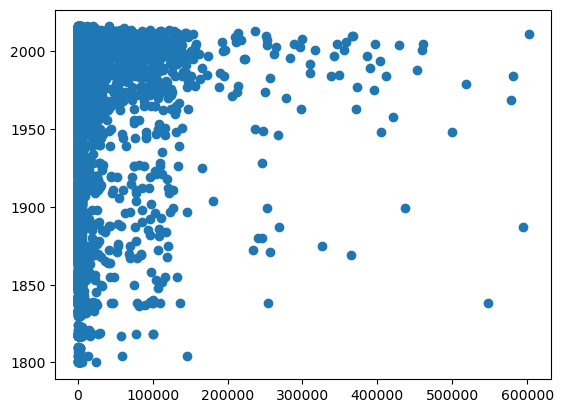

In [22]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)

**Observation: no relation**
  Pearson coeffiecnt =0

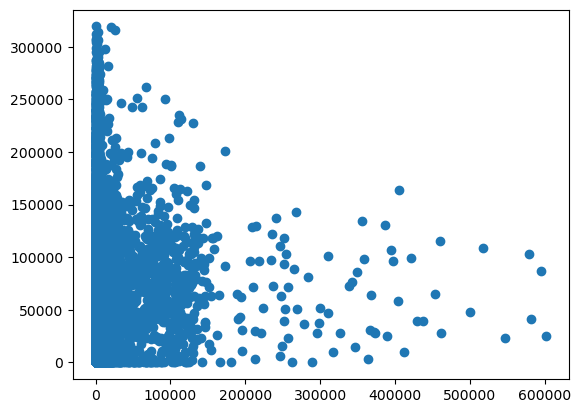

In [23]:
col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

**no relation**

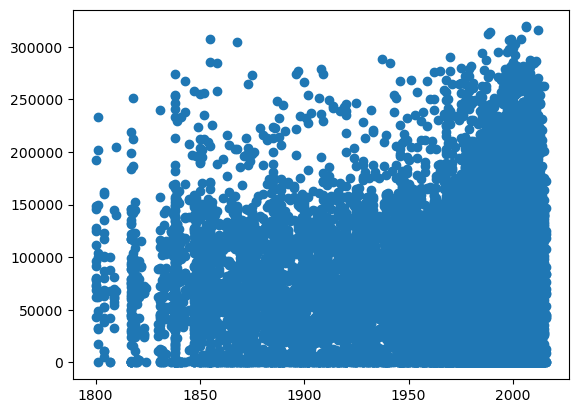

In [24]:
col1=visa_df['prevailing_wage']
col2=visa_df['yr_of_estab']
plt.scatter(col2,col1)

**No relation**

**Correlation Coeffiecnt**

In [25]:
formula of pearson coeffiecnt

SyntaxError: invalid syntax (919096163.py, line 1)

ctrl+a
ctrl+c
ctrl+v
esc+m
shift+enter

- Pearson correlation coeffiecnt will give the amount of realtion between variables
- It is dentoed with r
- r varies from -1 to 1
- for +ve reltion r varies from 0 to 1
- for -ve realation r varies from -1 to 0
- for no relation r approximate 0
- In pyhton code we have **corr** function under pandas
   - This will give covariance matrix
   - we already discussed covariance matrix is rows and columns type
   - In this data we have 3 numerical columns
   - so we get 3*3 = 9 values
   - All trace of the matrix represents variance
   - Upper traingle and lower triangle represents covariance

In [ ]:
visa_df.corr(numeric_only=True)

# the graph shows and this is proff

**Observation**

- The correaltion values between no_of_employees and yr_of_estb approx=0
  - which indicates no relation
- The correaltion values between no_of_employees and prevaling_wage approx=0
  - which indicates no relation
- The correaltion values between yr_of_estb and prevaling_wage approx=0
  - which indicates no relation

**What happen if correlation is high**

- for that we will red wine quality dataset
- will perform the corr

In [27]:
wine_data=pd.read_csv(r'C:\Users\hp\Documents\Data Science\Naresh IT\Data Files\winequality_red - winequality_red.csv')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
wine_data=wine_data.drop_duplicates()
wine_data.iloc[1:,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


**How to make indexes in order**

In [ ]:
wine_data.columns

In [ ]:
len(wine_data.columns)

In [ ]:
wine_data.corr()

**Heat Map**

- will provide the matrix representation of correaltion value
- heat map represents value in color format
- different different value in different color
- beside matrix it will display color bar
- Color Bar means like a scale of values with color

In [ ]:
# under seaborn package

<Axes: >

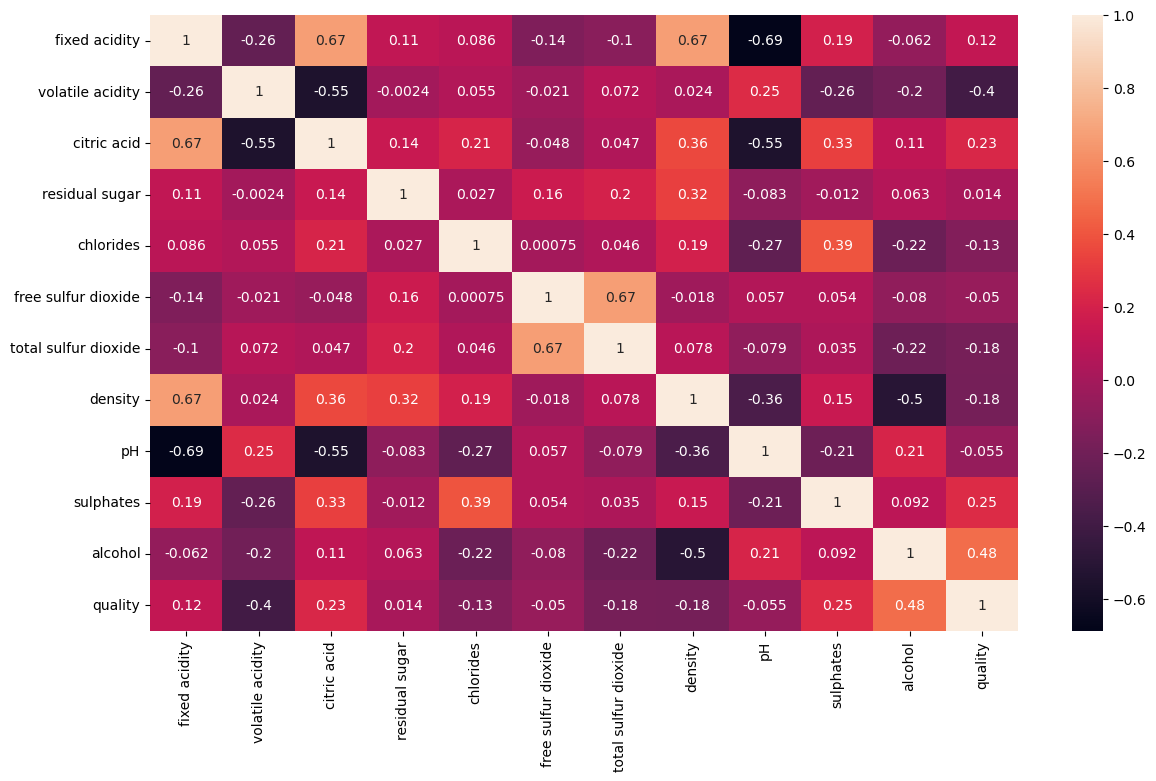

In [29]:
plt.figure(figsize=(14,8))
wine_corr=wine_data.corr()
sns.heatmap(wine_corr,annot=True)

In [32]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

<Axes: >

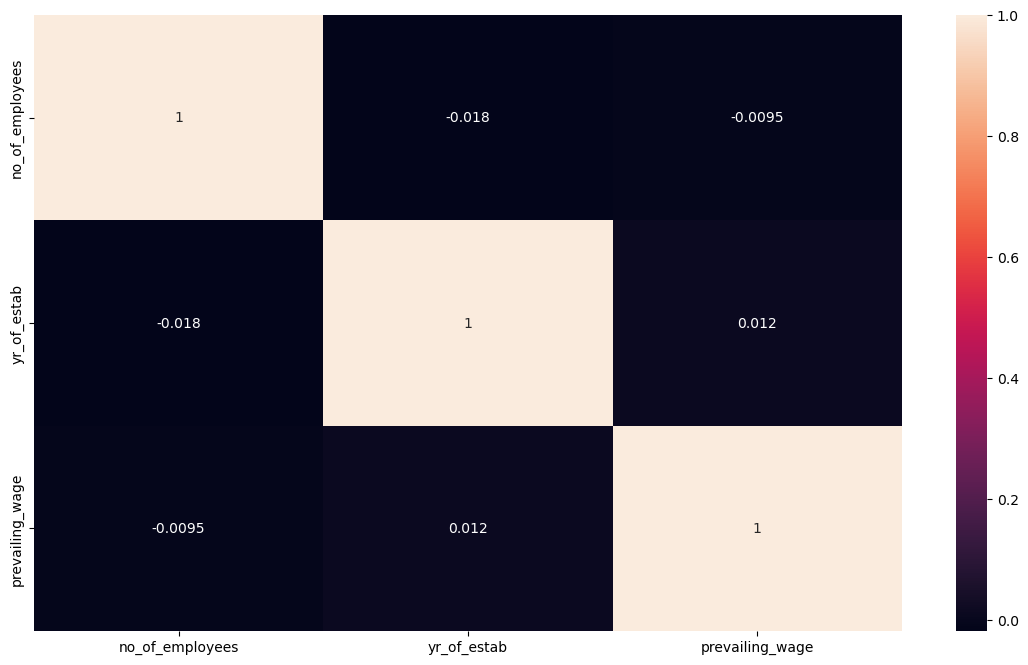

In [33]:
plt.figure(figsize=(14,8))
visa_corr=visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr,annot=True)

In [34]:
# Draw the scatter plot for wine data columns
# Which is having highest +ve correlation
# Which is having higest negative correlation

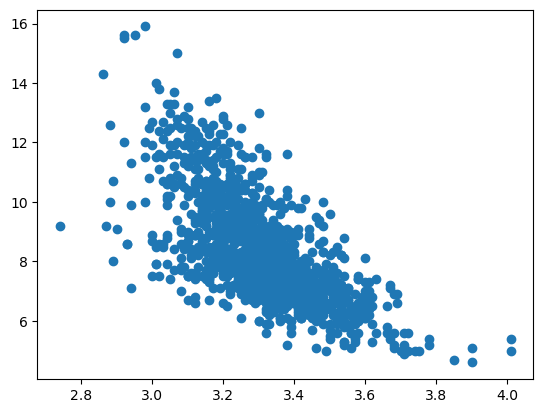

In [35]:
col1=wine_data['fixed acidity']
col2=wine_data['pH']
plt.scatter(col2,col1)

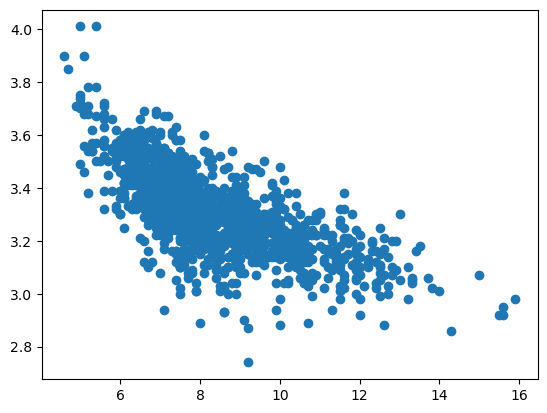

In [36]:
col1=wine_data['fixed acidity']
col2=wine_data['pH']
plt.scatter(col1,col2)

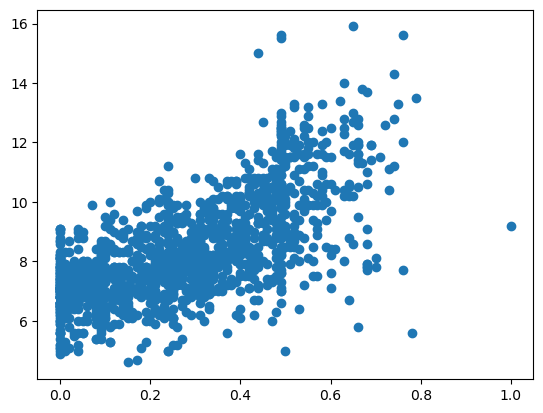

In [37]:
col1=wine_data['fixed acidity']
col2=wine_data['citric acid']
plt.scatter(col2,col1)